# import

In [1]:
import pandas as pd
from pandas import DataFrame
import seaborn as sns
import matplotlib.pyplot as plt

# data

In [2]:
data = pd.read_csv('rejected.csv', index_col=0)
data = data.applymap(str) # change all values to string

# methods

## make histogram

In [3]:
def make_hist(scs_dict, name, scale):   

    # make dataframe
    df = pd.DataFrame(list(scs_dict.items()))
    df.columns = [name,'Frequency']
    
    # sort frequency descending
    df = df.sort_values(['Frequency'],ascending=False).reset_index(drop=True)
    
    # plot
    ax = sns.barplot(x=name, y="Frequency", data=df, color="#636363")
    
    for index, row in df.iterrows():
        ax.text(row.name,row.Frequency, round(row.Frequency,2), color='black', ha="center")
    
    ax.set(ylim=(0, scale))
    #plt.xticks(rotation=90) # rotate label names on x-axis
    plt.xlabel("") # delete x label
    plt.savefig("characteristics/" + name +".png",bbox_inches='tight')

# create create dict of frequencies

In [4]:
def create_dict1(scs, key, df):
    
    scs_dict = {} # scs = selection criteria

    for sc in scs:
        freq = df[[sc]].eq(key).sum() # count frequency
        scs_dict[sc] = freq.get(key = sc) # place frequency in dict
    
    print(scs_dict)
    return scs_dict

In [5]:
def create_dict2(types, column_name, df):
    
    dict_out = {}

    for t in types:
        freq = df[[column_name]].eq(t).sum() # count frequency
        dict_out[t] = freq.get(key = column_name) # place frequency in dict

    print(dict_out)
    return dict_out 


# rejected studies

In [6]:
rejected = data[data["Primary Study"] != "Yes"]
scale = len(rejected.index)
print(scale)

426


{'IC1': 52, 'IC2': 8, 'IC3': 6, 'IC4': 15, 'IC5': 1}


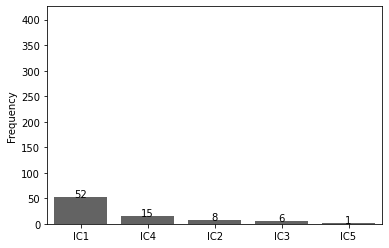

In [7]:
# inclusion criteria

ics = ['IC1', 'IC2', 'IC3', 'IC4', 'IC5']
ics_dict = create_dict1(ics, "0.0", rejected)
make_hist(ics_dict, "Studies rejected based on Inclusion Criteria", scale)

{'EC1': 61, 'EC2': 110, 'EC3': 69, 'EC4': 11, 'EC5': 20, 'EC6': 39, 'EC7': 53, 'EC8': 11, 'EC9': 15}


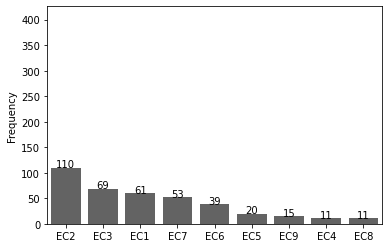

In [8]:
# exclusion criteria

ecs = ['EC1', 'EC2', 'EC3', 'EC4', 'EC5', 'EC6', 'EC7', 'EC8', 'EC9']
ecs_dict = create_dict1(ecs, "1.0", rejected)
make_hist(ecs_dict, "Studies rejected based on Exclusion Criteria", scale)

# selected studies

In [9]:
selected = pd.read_csv('selected.csv', index_col=0)
selected = selected.applymap(str) # change all values to string
scale = len(selected.index)
print(scale)

224


{'C': 78, 'J': 145, 'W': 1}


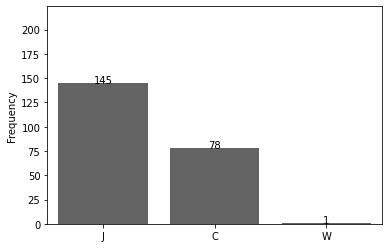

In [10]:
# venue type

venue_types = ["C", "J", "W"]
column_name = "Venue Type"
vt_dict = create_dict2(venue_types, column_name, selected)
make_hist(vt_dict, "Venue type", scale)

{'2018': 72, '2019': 95, '2020': 55, '2021': 2}


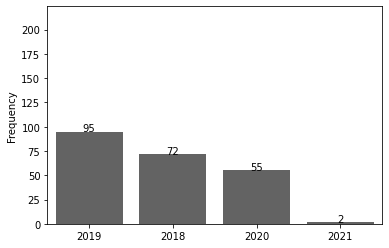

In [11]:
# year

years = ["2018", "2019", "2020", "2021"]
column_name = "Year"
year_dict = create_dict2(years, column_name, selected)
make_hist(year_dict, "Publication year", scale)

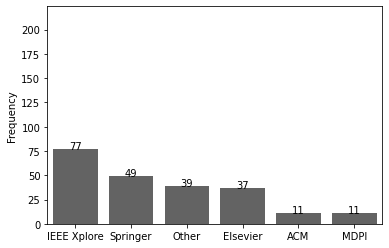

In [12]:
# venue

venues = ["ACM", "IEEE Xplore", "Elsevier", "Springer", "MDPI"]
column_name = "Venue Acronym"

dict_out = {}
counter = 0 # to count the total number of studies from the venues in the specified list

for venue in venues:
    freq = selected[[column_name]].eq(venue).sum() # count frequency
    freq = freq.get(key = column_name) # get int instead of series
    counter += freq
    dict_out[venue] = freq  # place frequency in dict
    
    
# add others to dict
dict_out["Other"] = scale - counter

make_hist(dict_out, "Venue", scale)